In [8]:
import matplotlib.pyplot as plt
import numpy as np
compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])

In [6]:

from pyod.models.knn import KNN
import pandas as pd
 
X = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})
 
clf = KNN(contamination=0.18)
clf.fit(X)
x_pred = clf.predict(X)
x_labels = clf.labels_ # binary labels (0: inliers, 1: outliers) 
x_anomalies_scores = clf.decision_scores_ 

print("\nX predictions: ", x_pred)
print("\nX labels predictions",x_labels)
print("\nX anomalous scores",x_anomalies_scores)

X[x_pred == 1]


X predictions:  [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]

X labels predictions [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]

X anomalous scores [ 7.87400787  5.38516481  8.1240384  19.67231557  5.09901951  6.70820393
  6.55743852  7.          5.09901951  4.12310563 26.07680962  5.
  8.06225775  4.89897949  6.55743852  9.11043358 19.74841766  9.
 50.49752469]


,edad,salario,compras
3,23,21,20
10,30,56,5
16,33,2,2
18,80,23,2


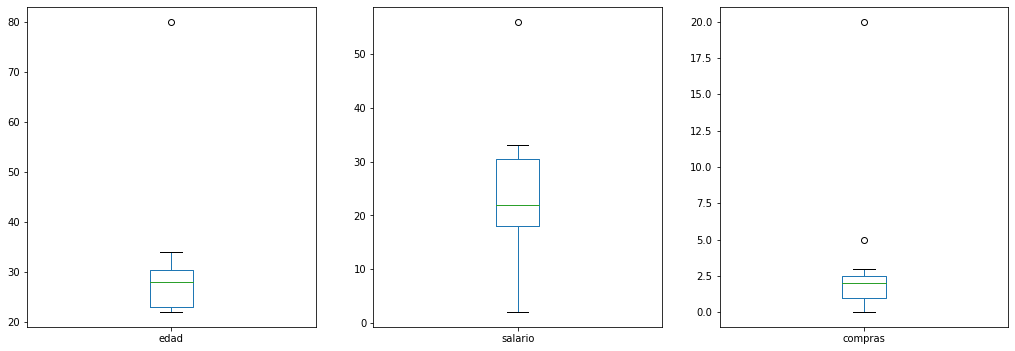

In [13]:
x = X
x.iloc[:,:3].plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False,figsize=(30,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1808e17f790>,
 'caps': [<matplotlib.lines.Line2D at 0x1808e17fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1808e17f430>],
 'medians': [<matplotlib.lines.Line2D at 0x1808d558550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1808d5588b0>],
 'means': []}

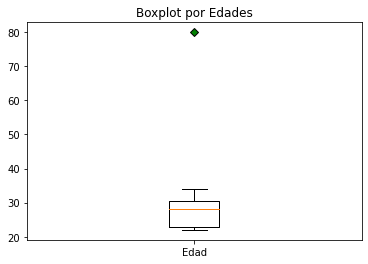

In [9]:
#other option to boxplot

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Edades')
ax.boxplot(edades, flierprops=green_diamond, labels=["Edad"])